# Anomaly detection for identifying potential customers

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

### Data Loading

Extracting segment id from taxonomny tag

In [2]:
taxonomy = pd.read_csv('taxonomy.csv')
d = {
    'user_uid': [],
    'attempt_id': [],
    'attempt_answers': []
}

for i in taxonomy.Tag:
    P = str(i)+'_P'
    A = str(i)+'_A'
    d[P] = []
    d[A] = []

### Data transformation

transforming json type data format to pandas dataframe to get the count and for further
data analysis. 

In [3]:
data = pd.read_csv('data.csv')

for index, i in data.iterrows():
    d['user_uid'].append(i.user_uid)
    d['attempt_answers'].append(i.attempt_answers)
    d['attempt_id'].append(i.attempt_id)
    score = ast.literal_eval(i.score)[0]
    for tag in taxonomy.Tag:
        P = str(tag)+'_P'
        A = str(tag)+'_A'
        d[P].append(score.get(P, 0))
        d[A].append(score.get(A, 0))

In [4]:
df = pd.DataFrame(d)

In [5]:
df.head()

,user_uid,attempt_id,attempt_answers,3249_P,3249_A,3250_P,3250_A,3558_P,3558_A,3570_P,...,38351_P,38351_A,38352_P,38352_A,38353_P,38353_A,38354_P,38354_A,38355_P,38355_A
0,aeb410da-154a-41ff-a6ef-f41dccf099ce,0007b181-a622-426a-abb6-a29c6e2ed6b9,86,1,0,1,0,1,0,1.0,...,1,0,1,1,1,0,1,0,1,0
1,65c0cf13-a144-40da-8ea5-1ef3f5777ca4,0016cfd9-b84d-4d8b-abe7-86157f5fe7b0,86,1,0,1,0,1,0,1.0,...,1,0,1,0,1,1,1,0,1,0
2,6b22dfe6-988a-46dd-a3a6-ad392fdbac94,0023e0ff-0363-4f56-940e-74006152e988,86,1,0,1,0,1,0,1.0,...,1,1,1,1,1,0,1,0,1,0
3,5d7a1d8a-ff71-4220-afb8-26b723945365,0025087d-7929-4542-bfb8-1c086d08b484,85,1,0,1,1,1,0,1.0,...,1,1,1,1,1,0,1,0,1,0
4,6b2cdba5-66a1-4d02-b90e-9ab0faea35bc,002690dd-f673-4f84-b365-219bd728db23,85,1,0,1,0,1,0,1.0,...,1,0,1,1,1,0,1,0,1,0


### JSON to Python Dataframe
We have data in JSON like format, so we need to handle it using JSON library,

Firstly we are converting class string to json format and then we are appending the key and values in new lists and then we are creating and puting into new dataframe.

Then for count oprtation we are putting it to flatList

In [6]:
df_ = []
for j in range(len(data)):
    Smalltrunk = []
    for i in json.loads(data.score[j]):
        Smalltrunk.append(pd.DataFrame.from_dict(i,orient='index'))
        df_.append(Smalltrunk[0].index.values)

flatList = [val for sublist in df_ for val in sublist]

In [7]:
Test = pd.DataFrame(flatList)
Test.columns = ["Test"]
Test.Test.value_counts().head()

10183_P    7495
9762_P     7495
30682_P    7495
11674_P    7495
5761_P     7495
Name: Test, dtype: int64

In [8]:
Test.Test.value_counts()

10183_P    7495
9762_P     7495
30682_P    7495
11674_P    7495
5761_P     7495
           ... 
30243_A      30
11220_A      29
30246_A      22
11826_A      20
11643_A       3
Name: Test, Length: 1277, dtype: int64

### Explorartory Data Analysis

In [9]:
df.groupby('attempt_answers').size()

attempt_answers
46        6
47     1207
48      614
82        2
83        2
84        9
85     2221
86     2527
87      904
94        1
100       1
172       1
dtype: int64

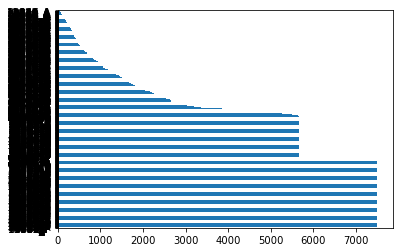

In [10]:
CountStatus = pd.value_counts(Test['Test'].values, sort=True)

CountStatus.plot.barh()

Handling the deleminiter and spliting data to Pandas dataframe

In [11]:
taxonomy = pd.read_csv("taxonomy.csv")

table_taxonomy = pd.concat([taxonomy.Tag, pd.DataFrame(taxonomy.Label.str.split("§").tolist())], axis=1)

In [12]:
table_taxonomy

,Tag,0,1,2,3,4,5,6
0,3249,Taxonomy2,Demographic,Children,Pre-school,None,None,None
1,3250,Taxonomy2,Demographic,Children,School-age,None,None,None
2,3558,Taxonomy2,Interests,Auto,None,None,None,None
3,3570,Taxonomy2,Interests,Current Affairs,None,None,None,None
4,3586,Taxonomy2,Interests,Current Affairs,Politics,None,None,None
...,...,...,...,...,...,...,...,...
665,38351,Taxonomy7,Holiday,"Having to have the very best hotels, restaura...",Totally Disagree,None,None,None
666,38352,Taxonomy7,Holiday,Wanting to come back from vacation feeling re...,Totally Agree,None,None,None
667,38353,Taxonomy7,Holiday,Wanting to come back from vacation feeling re...,Somewhat Agree,None,None,None
668,38354,Taxonomy7,Holiday,Wanting to come back from vacation feeling re...,Somewhat Disagree,None,None,None


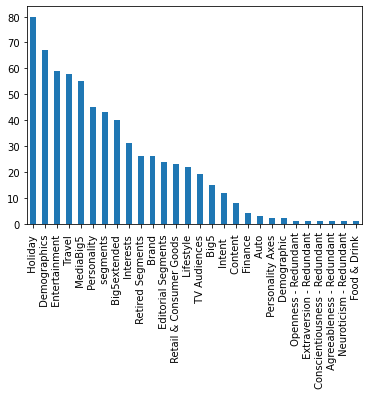

In [13]:
taxonomy_ = pd.concat([taxonomy.Tag, pd.DataFrame(taxonomy.Label.str.split("§").tolist())], axis=1)

CountStatus = pd.value_counts(taxonomy_.iloc[:,2].values, sort=True)

CountStatus.plot.bar()

In [16]:
#### An experiment to reduce dimentionality

#If you look at the chart above, several questions are being asked directly about holidays. Perhaps 
#that can be leveraged by perhaps considering (primarily) those variables that related to holidays. 
#Of the Tags in taxonomy I created a list of tags manually into a separate csv file, select_taxonomy.csv.
#The idea is to consider those variables which explicitly gauge the interest of users in taking a holiday. 
#I then created this code below to extract from our dataframe (variable table) only those variables whose
#tags are listed in select_taxonomy.csv. 
#Unfortunately I did not have time to test dimensionality reduction based on this assumption.


#taxonomy = pd.read_csv('select_taxonomy.csv')
#stringP = "_P"
#stringA = "_A"

#selected_variables = ['user_uid']
#for i in taxonomy.Tag:
    #selected_variables.append(str(i)+stringP)
    #selected_variables.append(str(i)+stringA)


In [14]:
##### Tried dimensionality reduction - PCA but it gave worse results
##### So using all the varilables as they are

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(totalMerged)
#totalMerged = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

### Holiday operator

In [17]:
conversion = pd.read_csv("conversion.csv")
conversion.head()

,user_uid,conv
0,5dc38445-0570-4740-a54a-92f7a515f6a5,1
1,b8253a38-2a49-47f9-bafe-f1fe38302d1f,1
2,5c935912-bc14-4ed4-a146-3604265ef40e,1
3,23b579c7-f75a-4e95-b4b0-6f4b3fe134ae,1
4,3332b115-ae67-440f-ba19-26dee8db2ffd,1


In [18]:
conversion.shape

(520, 2)

merging conversion column to dataframe of segment and user id, by unique identifier "user id"

In [19]:
MergedConvertedData = pd.merge(df, conversion, on='user_uid')

MergedConvertedData.head()

,user_uid,attempt_id,attempt_answers,3249_P,3249_A,3250_P,3250_A,3558_P,3558_A,3570_P,...,38351_A,38352_P,38352_A,38353_P,38353_A,38354_P,38354_A,38355_P,38355_A,conv
0,d05c64c7-fba5-4be3-bb63-975bb0fa60e7,0048fe01-2734-40fb-877e-29a574551c96,86,1,0,1,1,1,0,1.0,...,1,1,0,1,0,1,1,1,0,1
1,45dabb22-ef74-4f87-970d-b4185819ad12,007023f3-a00e-4667-a0fe-00755a82713d,85,1,1,1,1,1,0,1.0,...,0,1,1,1,0,1,0,1,0,1
2,1093e4e5-8aa8-42e1-b3c0-7e434e24c046,0119e966-a9bc-4053-9795-f8245cd8aaa1,86,1,0,1,0,1,0,1.0,...,0,1,1,1,0,1,0,1,0,1
3,fde9b60a-dba7-4873-b592-8a4e0d8e9114,01c1c90b-2660-47f4-853f-9ac397581449,87,1,0,1,0,1,0,1.0,...,0,1,0,1,1,1,0,1,0,1
4,f8a2390f-1436-4914-b67d-8ecd17e25d9c,0212149f-acb1-43a1-9ce5-31d91bcca8e2,87,1,0,1,0,1,0,1.0,...,0,1,1,1,0,1,0,1,0,1


In [20]:
MergedConvertedData.shape
# this is 535 and conversion is 520 rows. means 15 are either duplicates or they are users taking quiz again. deal with this

(535, 1344)

In [21]:
MergedConvertedData = MergedConvertedData.drop_duplicates(subset = 'user_uid',keep="first")

In [22]:
MergedConvertedData.shape
# fixed now

(520, 1344)

### Splitting dataset to train and test

In [23]:
totalMerged = MergedConvertedData.drop(['attempt_id','user_uid','attempt_answers','conv'],axis=1)

In [24]:
MergedConvertedData.head()

,user_uid,attempt_id,attempt_answers,3249_P,3249_A,3250_P,3250_A,3558_P,3558_A,3570_P,...,38351_A,38352_P,38352_A,38353_P,38353_A,38354_P,38354_A,38355_P,38355_A,conv
0,d05c64c7-fba5-4be3-bb63-975bb0fa60e7,0048fe01-2734-40fb-877e-29a574551c96,86,1,0,1,1,1,0,1.0,...,1,1,0,1,0,1,1,1,0,1
1,45dabb22-ef74-4f87-970d-b4185819ad12,007023f3-a00e-4667-a0fe-00755a82713d,85,1,1,1,1,1,0,1.0,...,0,1,1,1,0,1,0,1,0,1
2,1093e4e5-8aa8-42e1-b3c0-7e434e24c046,0119e966-a9bc-4053-9795-f8245cd8aaa1,86,1,0,1,0,1,0,1.0,...,0,1,1,1,0,1,0,1,0,1
3,fde9b60a-dba7-4873-b592-8a4e0d8e9114,01c1c90b-2660-47f4-853f-9ac397581449,87,1,0,1,0,1,0,1.0,...,0,1,0,1,1,1,0,1,0,1
4,f8a2390f-1436-4914-b67d-8ecd17e25d9c,0212149f-acb1-43a1-9ce5-31d91bcca8e2,87,1,0,1,0,1,0,1.0,...,0,1,1,1,0,1,0,1,0,1


spliting data for training and testing so that we can validate 
the model and predict on test set to get the accuracy of model

In [25]:
test_threshold = int(len(totalMerged)*0.60)
X_train = totalMerged.iloc[:test_threshold,]
X_test = totalMerged.iloc[test_threshold:,]
y_test = MergedConvertedData.iloc[test_threshold:,-1]

In [26]:
X_train.shape

(312, 1340)

In [27]:
X_test.shape

(208, 1340)

### Model 1: One class SVM  model

In [29]:
from sklearn import svm

oneclass = svm.OneClassSVM(nu=0.1, kernel='linear')

oneclass.fit(X_train)
y_pred = oneclass.predict(X_test)

y_pred = np.where(y_pred==-1, 0, y_pred)

from sklearn.metrics import accuracy_score

print('Accuracy of One class SVM model is ',np.round(accuracy_score(y_test, y_pred)*100,2))


Accuracy of One class SVM model is  85.58


#### Feature Importance

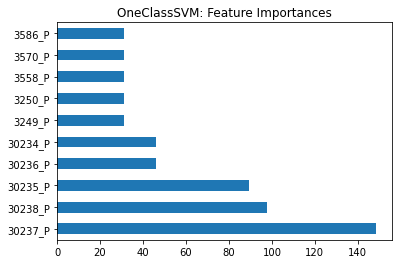

In [30]:
pd.Series(abs(oneclass.coef_[0]), index=X_train.columns).nlargest(10).plot(kind='barh', title='OneClassSVM: Feature Importances')

### Model 2: One Class IsolationForest model

In [31]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=10, contamination=0.2, warm_start=True)
clf.fit(X_train)

y_pred = clf.predict(X_test)

y_pred = np.where(y_pred==-1, 0, y_pred)

print('Accuracy of Isolation forest model is ',np.round(accuracy_score(y_test, y_pred)*100,2))

Accuracy of Isolation forest model is  82.69


### Submission file

In [32]:
submission = pd.read_csv("submission.csv")
subm = pd.merge(submission, df, on='user_uid')
subm.head()

,user_uid,p_conv,attempt_id,attempt_answers,3249_P,3249_A,3250_P,3250_A,3558_P,3558_A,...,38351_P,38351_A,38352_P,38352_A,38353_P,38353_A,38354_P,38354_A,38355_P,38355_A
0,00096248-a433-46a4-b247-698931728fbb,0.5,ff2606a0-8f94-40a2-9441-04cd2034728a,85,1,0,1,0,1,0,...,1,1,1,0,1,1,1,0,1,0
1,0010b3f0-b66c-49d4-b32e-9e82f3a142b7,0.5,950e35cf-18f5-409e-b504-15463d8e1be0,85,1,0,1,0,1,0,...,1,0,1,1,1,0,1,0,1,0
2,00179b27-7d95-4bd5-a455-e9e9a5011741,0.5,e3b12714-3891-4279-9e78-182c6ca561df,86,1,0,1,0,1,0,...,1,0,1,0,1,1,1,0,1,0
3,001c9ae6-f076-4112-a18e-2e99279a6f86,0.5,7bb1e670-93ec-406e-bd1e-0ad9d46976e3,86,1,0,1,0,1,0,...,1,1,1,0,1,1,1,0,1,0
4,002c07e1-538e-4b69-b359-5a74aabb9de0,0.5,358cc56b-18f0-4a31-8266-9b73a260863d,85,1,0,1,1,1,0,...,1,0,1,0,1,1,1,0,1,0


In [33]:
testSubmission = subm.drop(['attempt_id','user_uid','attempt_answers','p_conv'],axis=1)

X_test_ = pd.DataFrame({"p_conv":oneclass.predict(testSubmission)})
X_test_['user_uid'] = subm.user_uid

#X_test_.to_csv('submission_oneclass.csv',index=False)

In [34]:
testSubmission_IF = subm.drop(['attempt_id','attempt_answers','user_uid','p_conv'],axis=1)

X_test_IF = pd.DataFrame({"p_conv":clf.predict(testSubmission_IF)})
X_test_IF['user_uid'] = subm.user_uid

#X_test_IF.to_csv('submission_IF.csv',index=False)

## Model 3: Local Outlier Factor model

In [35]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1, novelty=True) 

lof.fit(X_train)

y_pred=lof.predict(X_test)

print('Accuracy of LocalOutlierFactor model is ',np.round(accuracy_score(y_test, y_pred)*100,2))

Accuracy of LocalOutlierFactor model is  89.9


In [36]:
testSubmissionLOF = subm.drop(['attempt_id','attempt_answers','user_uid','p_conv'],axis=1)

X_test_LOF = pd.DataFrame({"p_conv":lof.predict(testSubmissionLOF)})
X_test_LOF['user_uid'] = subm.user_uid

#X_test_LOF.to_csv('submission_LOF.csv',index=False)